<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Вывод-по-этапу-1" data-toc-modified-id="Вывод-по-этапу-1-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод по этапу 1</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модель-LogisticRegression" data-toc-modified-id="Модель-LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель LogisticRegression</a></span></li><li><span><a href="#Модель-RandomForestClassifier" data-toc-modified-id="Модель-RandomForestClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель RandomForestClassifier</a></span></li><li><span><a href="#Модель-DecisionTreeClassifier" data-toc-modified-id="Модель-DecisionTreeClassifier-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель DecisionTreeClassifier</a></span></li><li><span><a href="#Модель-CatBoostClassifier" data-toc-modified-id="Модель-CatBoostClassifier-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Модель CatBoostClassifier</a></span></li><li><span><a href="#Модель-XGBClassifier" data-toc-modified-id="Модель-XGBClassifier-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Модель XGBClassifier</a></span></li><li><span><a href="#Вывод-по-этапу-2" data-toc-modified-id="Вывод-по-этапу-2-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод по этапу 2</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Сводная-таблица-с-результатами" data-toc-modified-id="Сводная-таблица-с-результатами-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сводная таблица с результатами</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

# Введение

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymystem3 import Mystem
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Загрузка данных

Выполним загрузку данных с комментариями пользователей интернет-магазина и выведем первые 10 строк таблицы на экран:

In [2]:
data = pd.read_csv('/datasets/toxic_comments.csv')

In [3]:
data.head(10)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


Посмотрим основные данные о таблице:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
text     159571 non-null object
toxic    159571 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Посмотрим на распределение целевого признака:

In [5]:
data['toxic'].value_counts()

0    143346
1     16225
Name: toxic, dtype: int64

In [6]:
data['toxic'].value_counts(normalize=True)

0    0.898321
1    0.101679
Name: toxic, dtype: float64

Токсичные комментарии составляют 10% от общего числа комментариев.

Text(0.5, 0, 'Целевой признак')

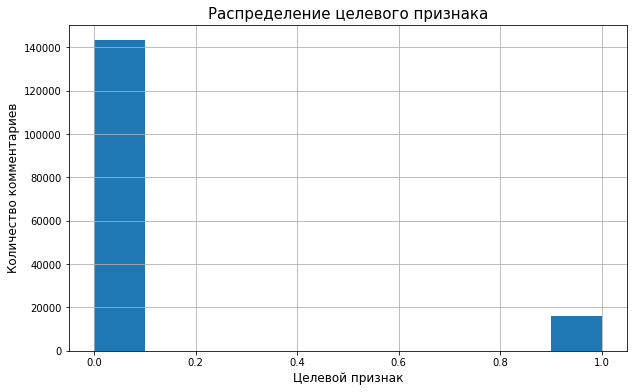

In [7]:
plt.figure(figsize = (10,6))
data['toxic'].hist()
plt.title('Распределение целевого признака', size=15)
plt.ylabel('Количество комментариев', size=12)
plt.xlabel('Целевой признак', size=12)

**Вывод**

Датасет data состоит из 2 столбцов (признаков) и 159571 строк (объектов). Пропущенные значения в датасете отсутствуют.

Целевой признак "toxic", содержащий сведения о заказах такси - категориальный, имеет целочисленный тип данных. Целевой признак равен «1» для положительного текста и «0» для отрицательного.

Признак "text" содержит текст комментария и имеет тип данных object.

Токсичные комментарии составляют 10% от общего числа комментариев.

Таким образом, в проекте требуется решить задачу классификации.

### Подготовка данных

Проверим таблицу с данными на наличие дубликатов:

In [8]:
data.duplicated().sum()

0

Дубликатов не обнаружено.

**Лемматизация**

Очистим текст от лишних символов с помощью инструмента регулярные выражения:

In [9]:
def clear_text(text):
    regular_text = re.sub(r'[^a-zA-Z]', ' ', text)
    clear_list = regular_text.split()
    clear_text = " ".join(clear_list)
    return clear_text.lower().split()

data['clear_text'] = data['text'].apply(clear_text)

И приведем слова к начальной форме (лемме):

In [10]:
%%time

lemmatizer = nltk.WordNetLemmatizer()

def lemmatize_text(text):
    lemm_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
    return lemm_text

data['lemm_text'] = data['clear_text'].apply(lemmatize_text)

CPU times: user 59.5 s, sys: 420 ms, total: 60 s
Wall time: 1min


Посмотрим на результаты очистки и лемматизации:

In [11]:
data.head(5)

,text,toxic,clear_text,lemm_text
0,Explanation\nWhy the edits made under my usern...,0,"[explanation, why, the, edits, made, under, my...",explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,"[d, aww, he, matches, this, background, colour...",d aww he match this background colour i m seem...
2,"Hey man, I'm really not trying to edit war. It...",0,"[hey, man, i, m, really, not, trying, to, edit...",hey man i m really not trying to edit war it s...
3,"""\nMore\nI can't make any real suggestions on ...",0,"[more, i, can, t, make, any, real, suggestions...",more i can t make any real suggestion on impro...
4,"You, sir, are my hero. Any chance you remember...",0,"[you, sir, are, my, hero, any, chance, you, re...",you sir are my hero any chance you remember wh...


In [12]:
data = data.drop(['text', 'clear_text'], axis=1)

**Разделение на выборки**

Разделим датафрейм на обучающую и тестовую выбороки:

In [13]:
target = data['toxic']
features = data.drop(['toxic'], axis=1)

In [14]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=123)

In [15]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((119678, 1), (39893, 1), (119678,), (39893,))

Cоздадим мешок слов и найдем стоп-слова:

In [16]:
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Оценим важность слов величиной TF-IDF и создадим корпуса слов:

In [17]:
count_tf_idf = TfidfVectorizer(stop_words=stopwords)

In [18]:
features_train = count_tf_idf.fit_transform(features_train['lemm_text'].values.astype('U'))
features_test = count_tf_idf.transform(features_test['lemm_text'].values.astype('U'))

In [19]:
features_train.shape, features_test.shape

((119678, 133475), (39893, 133475))

### Вывод по этапу 1

Резюмируем информацию, полученную на первом этапе выполнения проекта:
1. Датасет data состоит из 2 столбцов (признаков) и 159571 строк (объектов). Пропущенные значения в датасете отсутствуют. Целевой признак "toxic", содержащий сведения о заказах такси - категориальный, имеет целочисленный тип данных. Целевой признак равен «1» для положительного текста и «0» для отрицательного. Признак "text" содержит текст комментария и имеет тип данных object. Токсичные комментарии составляют 10% от общего числа комментариев.
2. Выполнена очистка и лемматизация текста.
3. Создан мешок слов, определены стоп-слова, важность слов оценена величиной TF-IDF.
4. Данные разбиты на валидационную и тестовыю выборки.

## Обучение

Обучим следующие модели:
<li>LogisticRegression</li>
<li>RandomForestClassifier</li>
<li>DecisionTreeClassifier</li>
<li>CatBoostClassifier</li>
<li>XGBClassifier</li>

Оценку качества моделей определим метрикой f1_score.

### Модель LogisticRegression

In [20]:
best_model = None
best_result = 0
best_C = 0
for param_C in [0.1, 1, 5, 10, 15, 20, 25, 30]:
    model = LogisticRegression(random_state=12345, class_weight='balanced', C=param_C)
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result  = f1_score(target_test, predictions)
    print('C =', param_C,':', result)
    if result > best_result:
        best_model = model
        best_result = result
        best_C = param_C
        
print("f1_score лучшей модели: {:.3f}".format(best_result), "C:", best_C)

C = 0.1 : 0.7031742694975824
C = 1 : 0.746584398413398
C = 5 : 0.7612146307798481
C = 10 : 0.7623947614593077
C = 15 : 0.7624100931493928
C = 20 : 0.7608103305295582
C = 25 : 0.7603286105488749
C = 30 : 0.7592460033404915
f1_score лучшей модели: 0.762 C: 15


### Модель RandomForestClassifier

In [21]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(1, 11):
    for depth in range (10, 51, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result  = f1_score(target_test, predictions)
        print('n_estimators =', est,':', result)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("f1_score лучшей модели: {:.3f}".format(best_result), "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

n_estimators = 1 : 0.04821037253469686
n_estimators = 1 : 0.05538165181796291
n_estimators = 1 : 0.11065006915629322
n_estimators = 1 : 0.16269841269841268
n_estimators = 1 : 0.18154825026511134
n_estimators = 2 : 0.012478163214374845
n_estimators = 2 : 0.050970873786407765
n_estimators = 2 : 0.19279239442847668
n_estimators = 2 : 0.24404513163393232
n_estimators = 2 : 0.29357072205736895
n_estimators = 3 : 0.03369672943508424
n_estimators = 3 : 0.03803408248950359
n_estimators = 3 : 0.06993686255463817
n_estimators = 3 : 0.10992655768775172
n_estimators = 3 : 0.13395348837209303
n_estimators = 4 : 0.00353356890459364
n_estimators = 4 : 0.012550200803212853
n_estimators = 4 : 0.06196633325201267
n_estimators = 4 : 0.13221209997664096
n_estimators = 4 : 0.15363385464581417
n_estimators = 5 : 0.002525890376357666
n_estimators = 5 : 0.03274621681964773
n_estimators = 5 : 0.0548885077186964
n_estimators = 5 : 0.10360467892098352
n_estimators = 5 : 0.11775833530385434
n_estimators = 6 : 0.0

### Модель DecisionTreeClassifier

In [22]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 16):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result  = f1_score(target_test, predictions)
    print('max_depth =', depth,':', result)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
        
print("f1_score лучшей модели: {:.3f}".format(best_result), "Глубина дерева:", best_depth)

max_depth = 1 : 0.29551790692687113
max_depth = 2 : 0.38189935064935066
max_depth = 3 : 0.38164839626471786
max_depth = 4 : 0.43802133850630454
max_depth = 5 : 0.23760214377874084
max_depth = 6 : 0.4853757867456498
max_depth = 7 : 0.5213068181818182
max_depth = 8 : 0.549618320610687
max_depth = 9 : 0.5672304800956774
max_depth = 10 : 0.5675813874211691
max_depth = 11 : 0.5822021116138764
max_depth = 12 : 0.5827686350435625
max_depth = 13 : 0.5892974392646093
max_depth = 14 : 0.5799466499293896
max_depth = 15 : 0.5924185463659147
f1_score лучшей модели: 0.592 Глубина дерева: 15


### Модель CatBoostClassifier

In [23]:
best_model = None
best_result = 0
best_iter = 0
best_depth = 0
for iter in range(50, 101, 50):
    for depth in range (2, 6, 2):
        model = CatBoostClassifier(random_state=12345,loss_function='Logloss', learning_rate=0.9, verbose=10, iterations=iter, max_depth=depth)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result  = f1_score(target_test, predictions)
        print('iterations =', iter,':', result)
        if result > best_result:
            best_model = model
            best_result = result
            best_iter = iter
            best_depth = depth

print("f1_score лучшей модели: {:.3f}".format(best_result), "Количество деревьев:", best_iter, "Максимальная глубина:", best_depth)

0:	learn: 0.2910817	total: 1.74s	remaining: 1m 25s
10:	learn: 0.2018616	total: 17.2s	remaining: 1m 1s
20:	learn: 0.1825090	total: 32.2s	remaining: 44.5s
30:	learn: 0.1684440	total: 47.5s	remaining: 29.1s
40:	learn: 0.1594121	total: 1m 2s	remaining: 13.8s
49:	learn: 0.1538833	total: 1m 16s	remaining: 0us
iterations = 50 : 0.7245813397129186
0:	learn: 0.2742297	total: 2.67s	remaining: 2m 10s
10:	learn: 0.1813343	total: 27.6s	remaining: 1m 38s
20:	learn: 0.1606691	total: 52.3s	remaining: 1m 12s
30:	learn: 0.1484387	total: 1m 17s	remaining: 47.3s
40:	learn: 0.1404692	total: 1m 41s	remaining: 22.3s
49:	learn: 0.1352547	total: 2m 4s	remaining: 0us
iterations = 50 : 0.7425756917282341
0:	learn: 0.2910817	total: 1.6s	remaining: 2m 38s
10:	learn: 0.2018616	total: 17.1s	remaining: 2m 18s
20:	learn: 0.1825090	total: 32.3s	remaining: 2m 1s
30:	learn: 0.1684440	total: 48.2s	remaining: 1m 47s
40:	learn: 0.1594121	total: 1m 4s	remaining: 1m 32s
50:	learn: 0.1534830	total: 1m 19s	remaining: 1m 16s
60:

### Модель XGBClassifier

In [24]:
best_model = None
best_result = 0
best_depth = 0
for est in range(100, 501, 400):
    model = XGBClassifier(random_state=12345, n_jobs=-1, n_estimators=est)
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result  = f1_score(target_test, predictions)
    print('n_estimators =', est,':', result)
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est
        
print("f1_score лучшей модели: {:.3f}".format(best_result), "Количество деревьев:", best_est)

n_estimators = 100 : 0.5741694794812577
n_estimators = 500 : 0.7187937198818591
f1_score лучшей модели: 0.719 Количество деревьев: 500


### Вывод по этапу 2

На втором этапе обучены следующие модели: `LogisticRegression`, `RandomForestClassifier`, `DecisionTreeClassifier`, `CatBoostClassifier`, `XGBClassifier`.

Оценка результатов моделей будет приведена на следующем этапе.

## Выводы

### Сводная таблица с результатами

In [27]:
data_model = {'Модель':['LogisticRegression', 'RandomForestClassifier', 'DecisionTreeClassifier', 'CatBoostClassifier', 'XGBClassifier'], 
            'f1_score': [0.762, 0.294, 0.592, 0.761, 0.719],
            'Количество деревьев': ['-', 50, 15, 100, 500],
            'Макс. глубина': ['-', 2, '-', 4, '-']}

In [28]:
results_tabel = pd.DataFrame(data_model)
results_tabel

,Модель,f1_score,Количество деревьев,Макс. глубина
0,LogisticRegression,0.762,-,-
1,RandomForestClassifier,0.294,50,2
2,DecisionTreeClassifier,0.592,15,-
3,CatBoostClassifier,0.761,100,4
4,XGBClassifier,0.719,500,-


С поставленной задачей - достичь метрику качества F1 не меньше 0.75, справились только две модели: `LogisticRegression` и `CatBoostClassifier`, показав практически одинаковые результаты.

Наилучшей результат с метрикой f1_score = 0.762 был предсказан алгоритмом `LogisticRegression`. Тем более, модель `LogisticRegression` и обучается быстрее, чем `CatBoostClassifier`. Модель `CatBoostClassifier` показала результат f1_score = 0.761.

### Общий вывод

В данной проектной работе на основании имеющихся данных интернет-магазина "Викишоп" обучены модели классификации комментариев на позитивные и негативные.

В процессе работы на начальном этапе была выполнена предобработка данных: выполнена лемматизация текста, создан мешок слов, определены стоп-слова, важность слов оценена величиной TF-IDF, данные разбиты на валидационную и тестовыю выборки.

На втором этапе выполнено обучение моделей с подбором гиперпараметров. Для обучения моделей использованы алгоритмы: `LogisticRegression`, `RandomForestClassifier`, `DecisionTreeClassifier`, `CatBoostClassifier`, `XGBClassifier`.

Лучшая модель с учетом метрики f1_score = 0.762 и скорости работы - `LogisticRegression`.